# Проектная работа 
# "Разработка взаимодействия с клиентами сети фитнес-центров"

<b> Проект: </b>
- Разработка стратегии взаимодействия с клиентами сети фитнес-центров «Культурист-датасаентист» на основе аналитических данных.

<b> Предоставленные данные: </b>
- Csv-файл, содержащий данные на месяц до оттока и факт оттока на определённый месяц.

<b> Задачи: </b>
- Проведение анализа и подготовка плана действий по удержанию клиентов:

1) Прогноз вероятности оттока (на уровне следующего месяца) для каждого клиента;

2) Формирование типичных портретов клиентов (выделение групп с общими признаками, характеристика их основных свойств);

3) Анализ основных признаков, наиболее сильно влияющих на отток.

<b> Ожидаемый результат: </b>
- Формулировка основных выводов и разработка рекомендаций по повышению качества работы с клиентами:

1) Выделение целевых групп клиентов;

2) Разработка мер по снижению оттока;

3) Определение иных особенностей взаимодействия с клиентами.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации-бизнесу" data-toc-modified-id="Общий-вывод-и-рекомендации-бизнесу-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод и рекомендации бизнесу</a></span></li></ul></div>

## Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2446,0,0,0,0,1,6,0,32,32.782459,4.0,4,2.226882,2.257186,0
1328,0,0,0,0,1,1,0,28,165.017227,1.0,1,0.343152,0.457256,1
1111,0,1,1,1,1,6,0,24,65.202380,4.0,2,0.853426,0.602995,1
420,0,1,0,1,1,1,1,24,65.825246,1.0,1,0.770793,0.562169,1
963,1,1,0,0,0,1,0,23,257.721749,1.0,2,3.566431,3.572159,0
736,1,1,1,1,1,1,0,28,158.872713,1.0,2,0.825241,0.749740,0
3174,1,1,0,0,1,1,0,31,69.473065,1.0,1,0.567467,0.000000,1
1654,1,1,1,0,1,6,0,31,227.060009,6.0,4,2.820393,2.748149,0
2090,1,1,1,0,1,1,0,33,267.083426,1.0,4,1.930005,2.044278,0
928,0,1,0,0,1,1,0,30,269.847065,1.0,1,2.985723,3.017419,0


In [4]:
gym.info()
gym.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Пропуски в данных отсутствуют. Средние значения уже позволяют сформировать портрет типичного клиента.

In [5]:
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype('int')

### Вывод

Для исследования у нас имеется таблица, состоящая из 4000 строк и 14 столбцов, содержащая информацию о клиентах сети. Пропуски в данных отсутствуют, типы данных соответствуют содержащимся значениям (для удобства изменен лишь Month_to_end_contract на целые значения).

## Исследовательский анализ данных (EDA)

In [6]:
gym.duplicated().sum()

0

Дубликаты отсутствуют

In [7]:
gym.Churn.value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Из общего количетсва клиентов (4000) почти четверть (1061) составляют "ушедшие клиенты".

In [8]:
gym.groupby('Churn').mean().T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Средние значения с разбивкой на ушедших и оставшихся позволяют выявить сильно отличающиеся признаки у этих двух групп. Визуализируем эти признаки двух групп для наглядности.

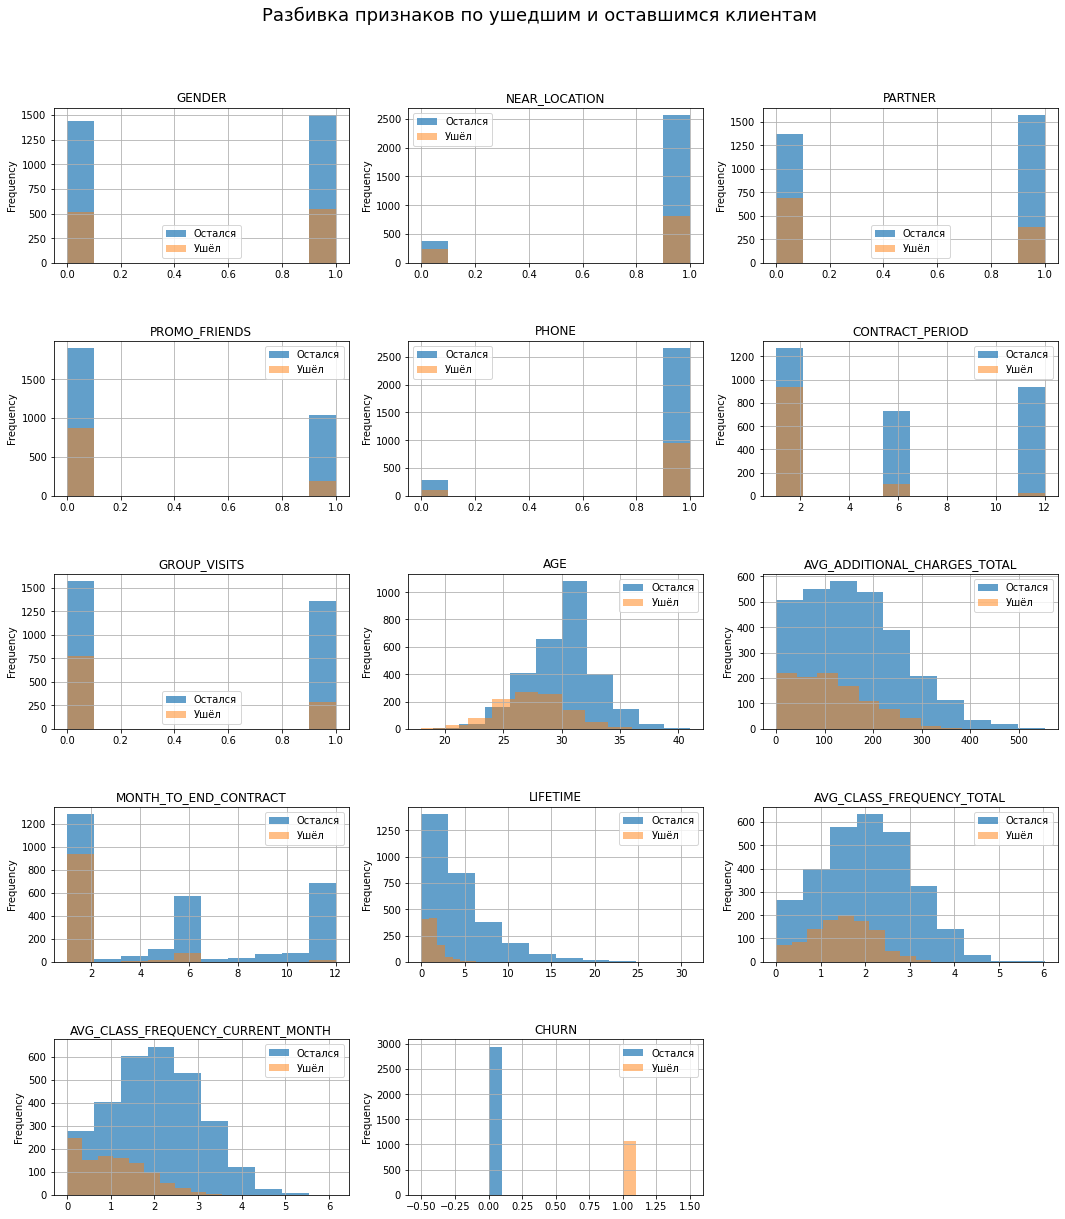

In [9]:
# В цикле прогоним названия столбцов (признаки) и по каждому построим графики для двух групп
plt.figure(figsize=(18, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Разбивка признаков по ушедшим и оставшимся клиентам", fontsize=18, y=0.95)
for n, col in enumerate(gym.columns):
    ax = plt.subplot(5, 3, n + 1)
    gym.query('Churn == 0').plot(kind='hist', y=col, alpha=0.7, label='Остался', ax=ax, title=col)
    gym.query('Churn == 1').plot(kind='hist', y=col, alpha=0.5, label='Ушёл', ax=ax, grid=True, legend=True)
    
    ax.set_title(col.upper())
    ax.set_xlabel("")
plt.show();

Основываясь на результатах визуализации, по многим признакам можно сделать ценные для исследования выводы, а также выдвинуть гипотезы о характеристиках ушедших и оставшихся клиентов фитнес-центра. Сделаем это в подведении итогов раздела.

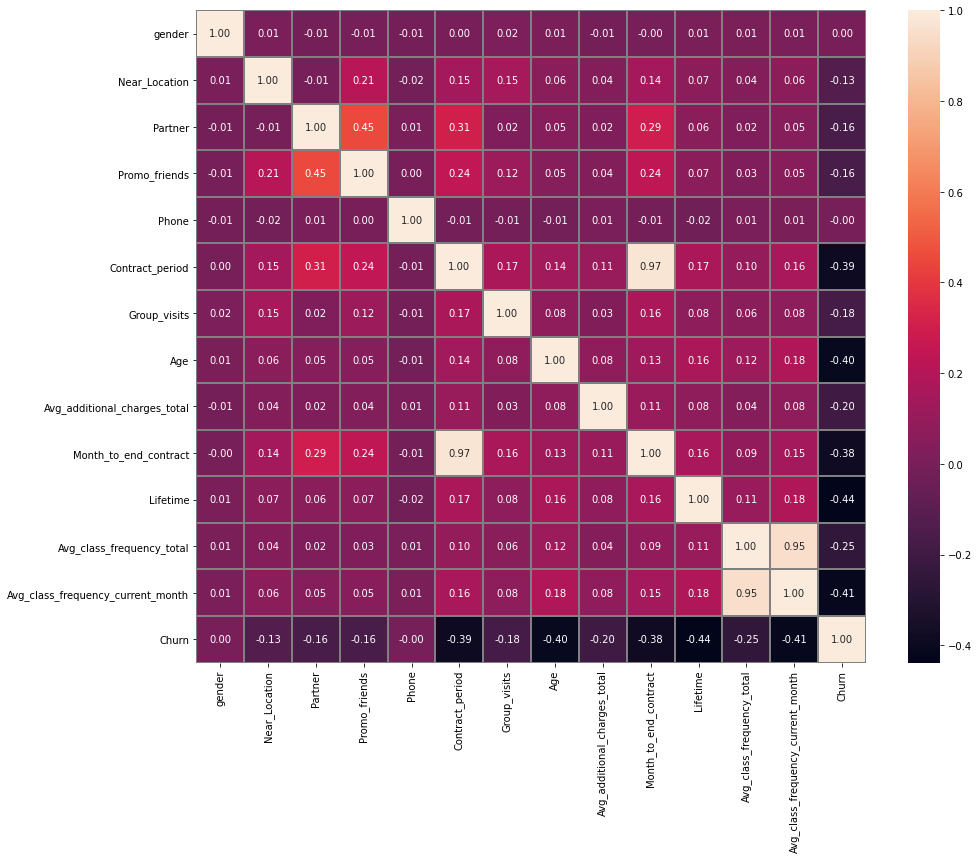

In [10]:
# Построим матрицу корреляций
cm = gym.corr()
# Визуализируем тепловую карту с подписями для матрицы корреляций
fig = plt.subplots(figsize=(15,12)) 
sns.heatmap(cm, annot = True, fmt='.2f', linewidths=1, linecolor='gray')

plt.show();

Самыми коррелирующими оказались две группы признаков "срок действия контракта" - "количество месяцев до окончания контракта" и "средняя частота посещений в неделю за предыдущий месяц" - "средняя частота посещений в неделю за все время", что логически легко поддается объяснению. Явных признаков, коррелирующих с оттоком клиентов на матрице к сожалению не замечено, что не говорит об их отсутствии, так как данные об оттоке являются категориальными и имеют всего два значения, что не лучшим образом сказывается на матрице.

### Вывод

Проведя исследовательский анализ данных можно составить портрет среднестатистического клиента фитнес-центра:

- В равной стпени мужчина или женщина, отток по данному признаку одинаков;
- В основном проживает поблизости с фитнес-центром, проживающие дальше уходят заметно чаще;
- Немного чаще сотрудник компании-партнера, отток таких клиентов ниже;
- Чаще не является участником акции «приведи друга», отток у участников акции - ниже;
- Практически всегда предоставлет контактный телефон, признак скорее всего не влияет на желание уйти;
- Немного чаще заключает краткосрочный контракт на 1 месяц, реже на год, однако практически все ушедшие клиенты заключили краткосрочные контракты;
- Немного чаще посещает групповые занятия, отток среди этих клиентов так же выше;
- Средний возраст - 30 лет, ушедшие клиенты немного младше, в среднем им 27 лет;
- Средний расход на иные услуги центра - 158 у.е., ушедшие тратились пропорционально меньше;
- У исследуемого неушедшего среднестатистического клиента - 5.2 месяца до окончания контракта, а уходят, как правило, когда действие контракта уже подходит к концу - 1.6 месяца;
- Среднее количество времени, проведенное с момента первого посещения - 4.7 месяца у оставшихся, когда решение о прекращении посещения принимается уходящими в среднем за 1 месяц;
- Средняя частота посещений за все время и за прошедший месяц у остающихся не изменяется - 2 раза в неделю. Количество занятий у ушедших ниже и со временем только уменшается, с общего за весь период - 1.5 до 1 занятия в неделю в последнем месяце.

Проведя разведочный анализ основных свойств данных, мы убедились в отсутствии аномальных значений, нормальном распределении данных, а также установили в них некоторые закономерности, благодаря которым можно сформировать первые гипотезы и построить предварительные прогнозы по предрасположенности к оттоку определенной группы клиентов. Однако не будем торопить события и предоставим право машинам построить свои прогнозы, а на выходе сравним их с человеческими.

## Построение модели прогнозирования оттока клиентов

In [11]:
# Делим данные на признаки и целевую переменную
X = gym.drop('Churn', axis=1)
y = gym['Churn']

In [12]:
# Разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [13]:
# В функцию упакуем команды для вызова необходимых метрик
def metrics(y_true, y_pred, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\troc_auc: {:.2f}'.format(roc_auc_score(y_true, y_pred)))

In [14]:
# Обучим модель логистической регрессией..
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
metrics(y_test, predictions, title='Метрики модели логистической регрессии')
print('---------------------------------------')

# ..и случайным лесом
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train, y_train)
predictions = rfc_model.predict(X_test)
metrics(y_test, predictions, title='Метрики модели случайного леса');

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Метрики модели логистической регрессии
	Accuracy: 0.92
	Precision: 0.89
	Recall: 0.81
	F1: 0.85
	roc_auc: 0.89
---------------------------------------
Метрики модели случайного леса
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	roc_auc: 0.89


### Вывод

При проверке моделей на валидационной выборке,используемые метрики у моделей практически одинаковы. При построении дальнейших прогнозов можно основываться на результатах этих двух моделей. 

## Кластеризация клиентов

In [15]:
# Стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)
# Создадим таблицу связок между объектами
linked = linkage(X_sc, method = 'ward') 

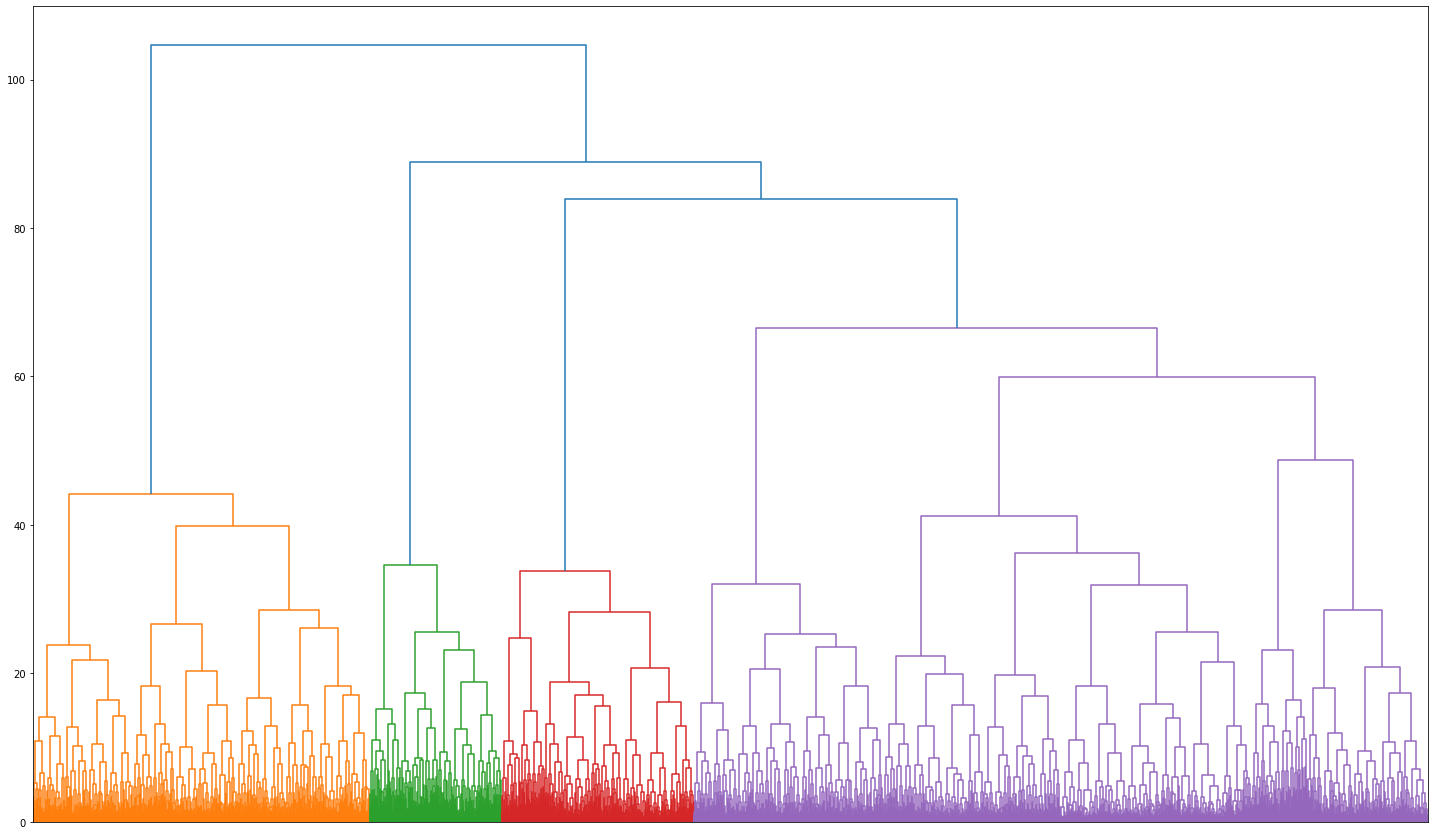

In [16]:
# Построим дендрограмму
plt.figure(figsize=(25, 15))  
dendrogram(linked, orientation='top', no_labels=True)
plt.show();

Исходя из визуализации агломеративной кластеризации, получаем оптимальное число кластеров, предложенное алгоритмом - 4. Данное число кластеров и предложим алгоритму KMeans.

In [17]:
# Задаём модель k_means с числом кластеров, равным 4
km = KMeans(n_clusters = 4, random_state=0)
# Прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)

In [18]:
# Создадим в таблице столбец с присвоенным номером кластера и сгруппируем по нему данные, получив их средние значения
gym['cluster'] = labels
gym_grouped_by_cluster = gym.groupby('cluster').mean().reset_index()
gym_grouped_by_cluster

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838
2,2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715
3,3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685


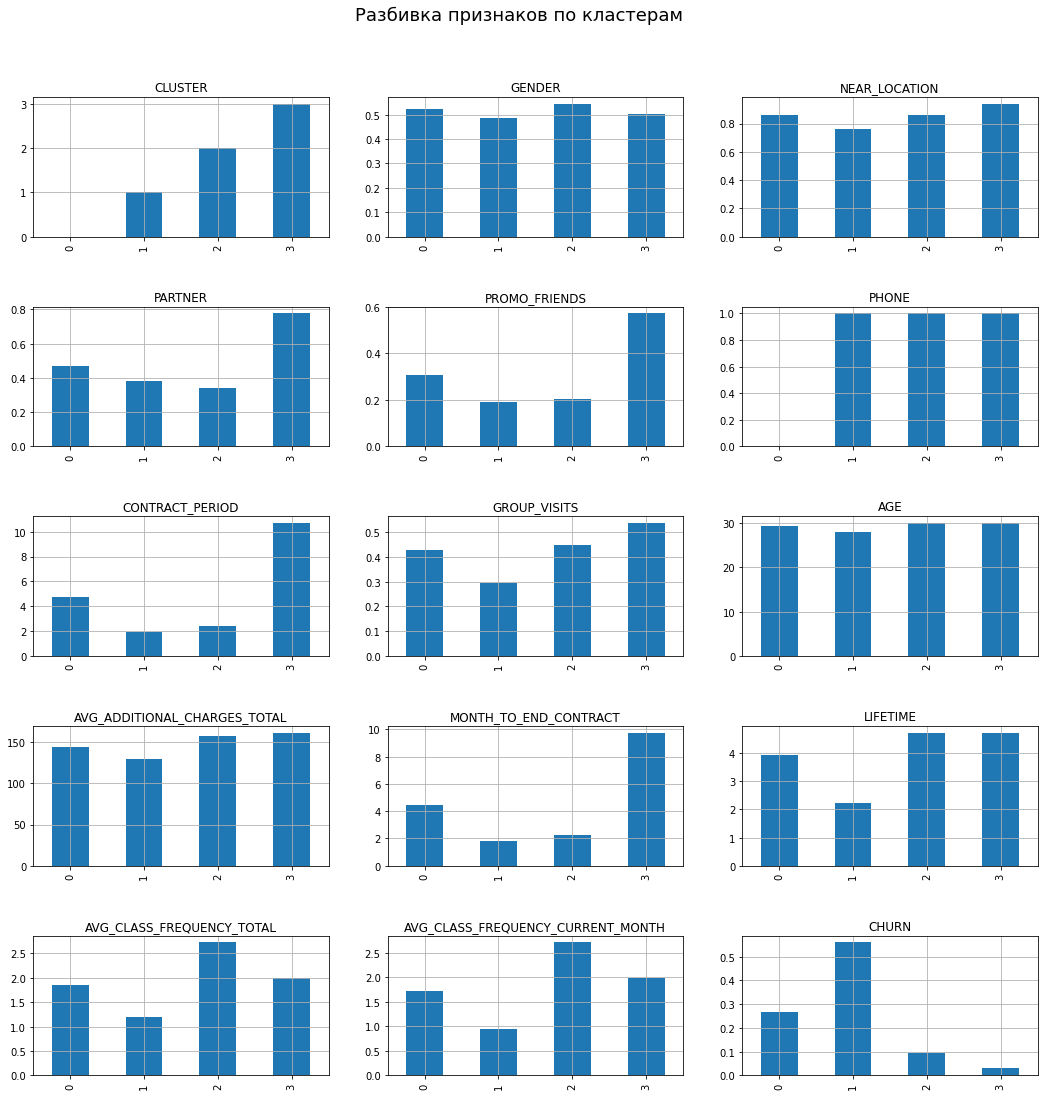

In [19]:
# В цикле построим графики для всех признаков с разбиением на кластеры
plt.figure(figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Разбивка признаков по кластерам", fontsize=18, y=0.95)
for n, col in enumerate(gym_grouped_by_cluster.columns):
    ax = plt.subplot(5, 3, n + 1)
    gym_grouped_by_cluster.plot.bar(ax=ax, y=col, title=col, grid=True)

    ax.set_title(col.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")
plt.show();

Визуализация показателей кластеров определила признаки присущие в основном клиентам попавшим в отток. Разберем подробнее для каждого кластера долю оттока, после чего сможем сделать более конкретные выводы.

In [20]:
# С помощью сводной таблицы высчитаем общее количество клиентов, отток и его долю
customer_churn = gym.pivot_table(index= 'cluster', values= 'Churn', aggfunc=['count', 'sum', 'mean'])
customer_churn.columns = ['Количество клиентов', 'Отток', 'Доля оттока']
customer_churn = customer_churn.sort_values(by='Доля оттока', ascending=False)
customer_churn

,Количество клиентов,Отток,Доля оттока
cluster,,,
1,1479,828,0.559838
0,386,103,0.266839
2,1057,98,0.092715
3,1078,32,0.029685


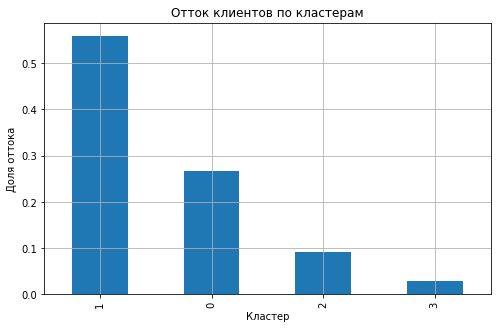

In [21]:
customer_churn['Доля оттока'].plot.bar(
    figsize = (8, 5), grid=True, title='Отток клиентов по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Доля оттока');

Кластер под номером 1 показал самые высокие показатели оттока. Признаки, присущие этой группе клиентов будем рассмаривать как тревожные, предупреждающие о возможном скором уходе клиента. Признаки 3го кластера наоборот будем рассматривать, как присущие лояльным клиентам.

### Вывод

Несмотря на то, что разбивка была осуществлена на 4 кластера, в первую очередь нас интересует группа клиентов, проявившая себя как самая склонная к уходу. Таким образом опишем признаки, присущие в основном клиентам, попавшим в первый кластер:
- Клиенты этой группы живут дальше всех от фитнес-центра;
- Скорее всего не являлись участниками акций и промо-компаний;
- Заключают самые краткосрочные контракты;
- В основном не посещают групповые занятия;
- Имеют меньше всего времени до окончания действия контракта;
- Первое посещение было позже остальных групп клиентов;
- Меньше остальных посещают фитнес-центр.

Группа клиентов, попавших в третий кластер, проявившая себя как самая лояльная, закономерно имеет признаки, обратные описанным выше.

Сопоставив полученные признаки с объективной реальностью и исходя из принципов логики, можно сказать, что модель кластеризации сработала хорошо. В целом они подтверждают гипотезы о признаках, присущих уходящим клиентам, выдвинутые на этапе разведочного анализа данных.

## Общий вывод и рекомендации бизнесу

Проводя данное исследование, мы основывались на результатах полученных путем проведения анализа человеком и машиной. Сопоставление реузльтатов проведенных на этапе исследовательского анализа данных аналитиком и результатов кластеризации клиентов, полученных благодаря алгоритму KMeans, не выявило значительной разницы, что может говорить о точности выводов и высоком качестве проведенного исследования.

Регулярно анализируя клиентов фитнес-центра, можно разделять их на лояльных и склонных к уходу.

<b>Признаки, присущие лояльным клиентам:</b>
1. Проживание рядом с клубом;
2. Партнерская программа;
3. Посещение по акциям и участие в промо-компаниях;
4. Заключение контракта на длительный срок;
5. Посещение групповых занятий;
6. В настоящий момент имеют длительный срок до окочания контракта;
7. Стабильно посещают центр не реже двух раз в неделю.

<b>Признаки, присущие клиентам, склонным к уходу:</b>
1. Живут дальше всех от клуба;
2. Не являлись участниками акций и промо-компаний;
3. Краткосрочные контракты;
4. Не посещают групповые занятия;
5. Действие контракта в ближайшее время заканчивается;
6. Реже остальных посещают фитнес-центр.

<b>При подобном разделении клиентов по признакам можно дать следующие рекомендации:</b>
1. Перераспределение расходов на удержание клиентов, снизив их для клиентов, характеризуемых как лояльных и увеличив их на клиентов, склонных к уходу;
2. Увеличение партнерских программ с компаниями, для привлечения лояльных клиентов на основе индивидуальных предложений;
3. Увеличение пробного периода для участников акции "Приведи друга", для более глубокого вовлечения и привязки клиента;
4. Отслеживание клиентов у которых до окончания срока действия контракта остается не более двух месяцев. Предложение различных скидок и бонусов продлевающим или перезаключающим контракт;
5. Отслеживание клиентов, теряющих интерес к занятиям и все реже посещающим фитнес-центр. Привлечение таких клиентов особыми условиями и скидками на инные услуги.
6. Пропорциональное снижение стоимости контракта при заключении его на более длительный срок.